# Prepapre Numerical Data

In [1]:
%config InlineBackend.figure_format='retina'
import logging
from ekorpkit import eKonf

logging.basicConfig(level=logging.WARNING)

print(eKonf.__version__)

0.1.30+13.g779907e.dirty


In [2]:
data_dir = "../data/fomc"
save_dataframe = eKonf.partial(
    config_group="_func_/save_dataframe", output_dir=data_dir
)
load_dataframe = eKonf.partial(config_group="_func_/load_dataframe", data_dir=data_dir)

## Load FOMC class

In [3]:
from ekorpkit import eKonf

cfg = eKonf.compose(config_group="io/fetcher/fomc")
cfg.output_dir = "../data/fomc"
fomc = eKonf.instantiate(cfg)

### Chairpersons

In [5]:
fomc.chairpersons

,last_name,first_name,from_date,to_date
0,Volcker,Paul,1979-08-06,1987-08-10
1,Greenspan,Alan,1987-08-11,2006-01-31
2,Bernanke,Ben,2006-02-01,2014-01-31
3,Yellen,Janet,2014-02-03,2018-02-03
4,Powell,Jerome,2018-02-05,2022-05-27


### Load Calendar

In [6]:
fomc.load_calendar(from_year=1982, force_download=False)

,unscheduled,forecast,confcall,speaker
date,,,,
1982-02-02,False,False,False,Paul Volcker
1982-03-30,False,False,False,Paul Volcker
1982-05-18,False,False,False,Paul Volcker
1982-05-20,False,False,True,Paul Volcker
1982-06-01,False,False,False,Paul Volcker
...,...,...,...,...
2022-06-15,False,True,False,other
2022-07-27,False,False,False,other
2022-09-21,False,True,False,other


In [7]:
fomc_calendar = fomc.calendar.copy()
fomc_calendar

,unscheduled,forecast,confcall,speaker
date,,,,
1982-02-02,False,False,False,Paul Volcker
1982-03-30,False,False,False,Paul Volcker
1982-05-18,False,False,False,Paul Volcker
1982-05-20,False,False,True,Paul Volcker
1982-06-01,False,False,False,Paul Volcker
...,...,...,...,...
2022-06-15,False,True,False,other
2022-07-27,False,False,False,other
2022-09-21,False,True,False,other


## Load Market Data

### Target FED Rate


In [8]:
cfg = eKonf.compose(config_group="io/fetcher=quandl")
cfg.series_name = "DFEDTAR"
cfg.series_id = ["DFEDTAR", "DFEDTARU"]
# cfg.force_download = True
quandl = eKonf.instantiate(cfg)

fedrates = quandl.data.copy()
fedrates

,DFEDTAR,series_id
date,,
1982-09-27,10.25,DFEDTAR
1982-09-28,10.25,DFEDTAR
1982-09-29,10.25,DFEDTAR
1982-09-30,10.25,DFEDTAR
1982-10-01,10.00,DFEDTAR
...,...,...
2022-05-21,1.00,DFEDTARU
2022-05-22,1.00,DFEDTARU
2022-05-23,1.00,DFEDTARU


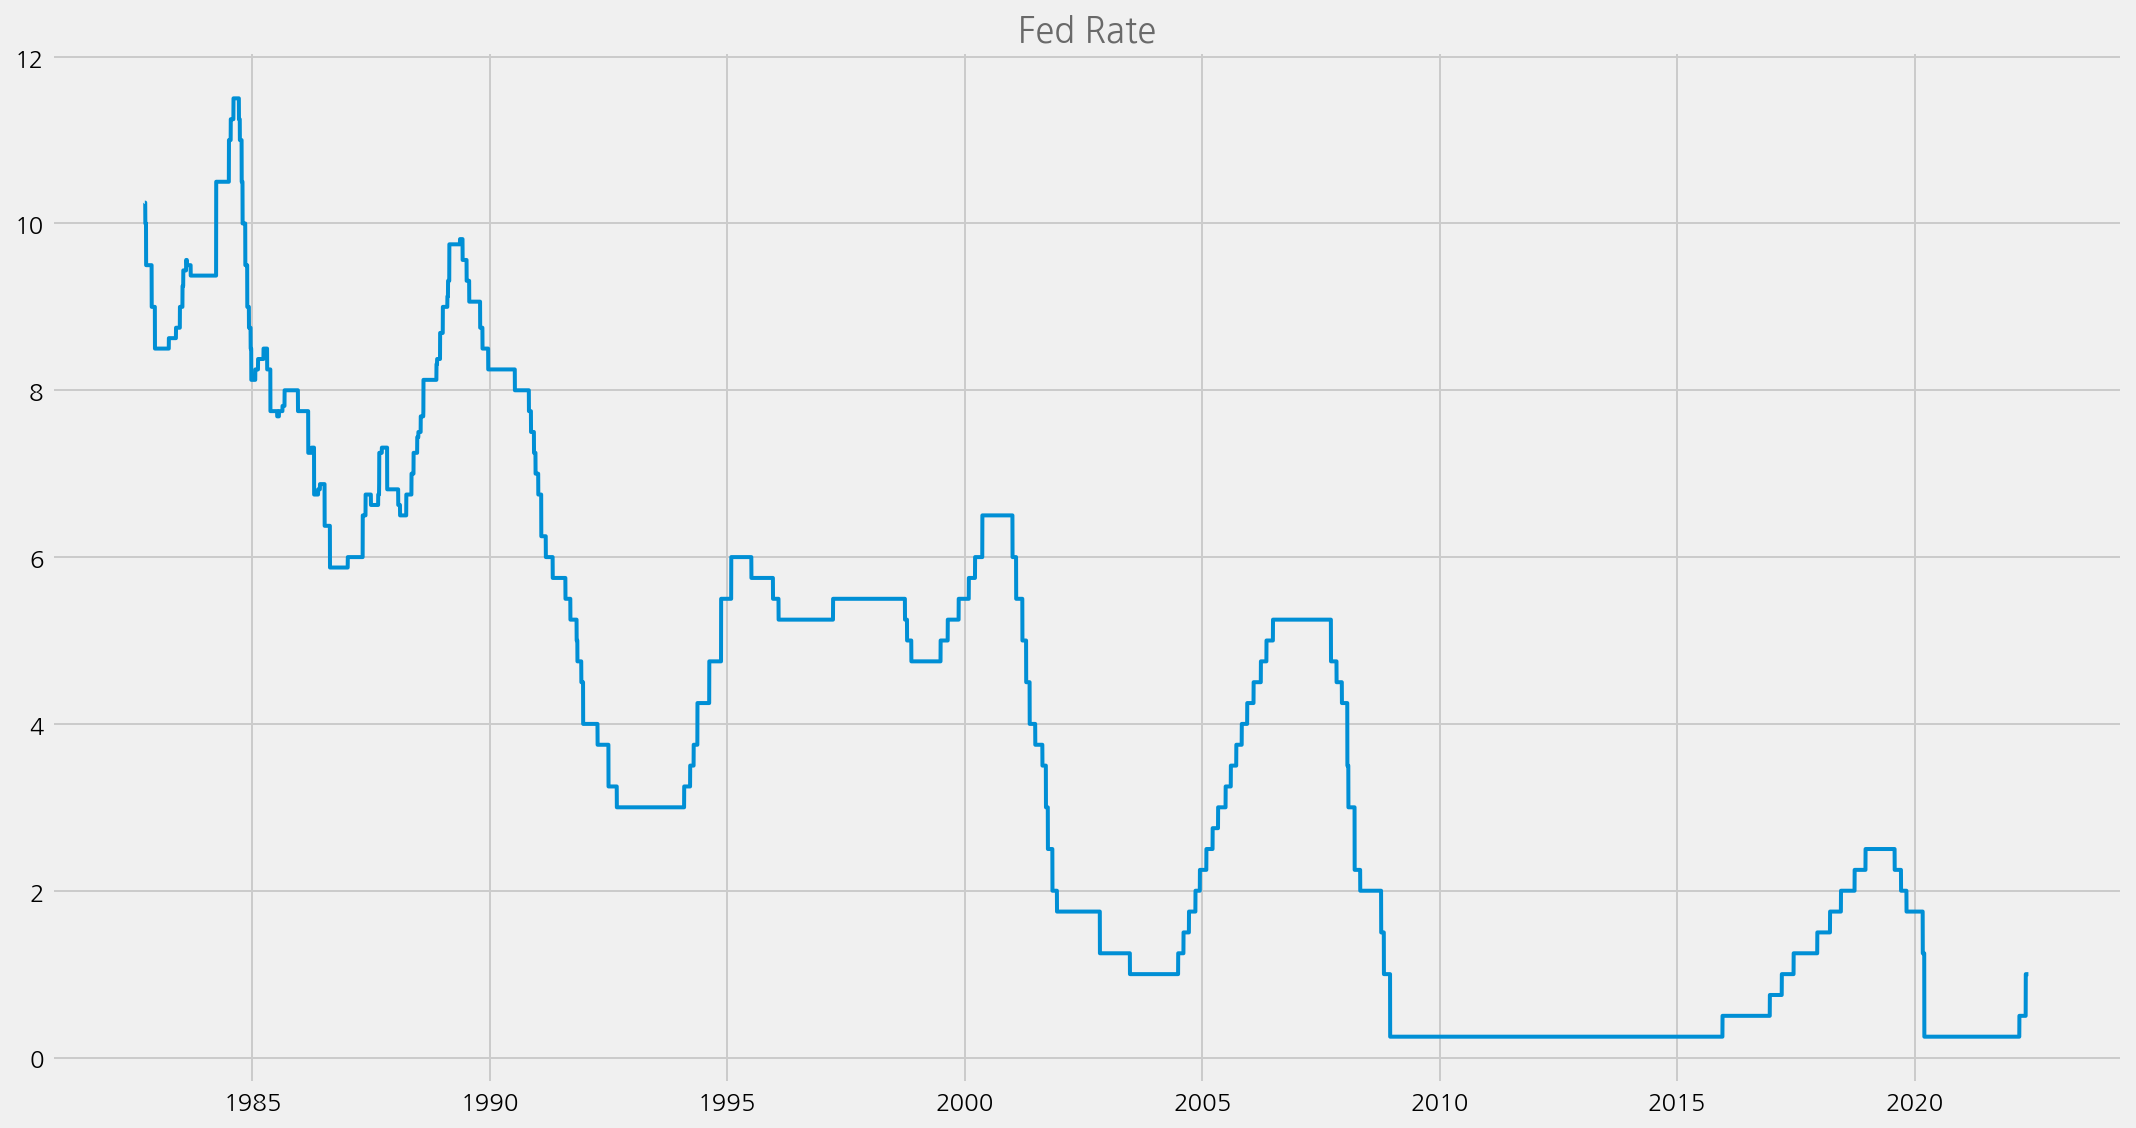

In [9]:
cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.series.y = 'DFEDTAR'
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Fed Rate'
eKonf.instantiate(cfg, data=fedrates)

### Effective FED Rate

In [10]:
dff = quandl.load(series_id="DFF")
dff

,DFF
date,
1954-07-01,1.13
1954-07-02,1.25
1954-07-03,1.25
1954-07-04,1.25
1954-07-05,0.88
...,...
2022-05-20,0.83
2022-05-21,0.83
2022-05-22,0.83


(827, 1)


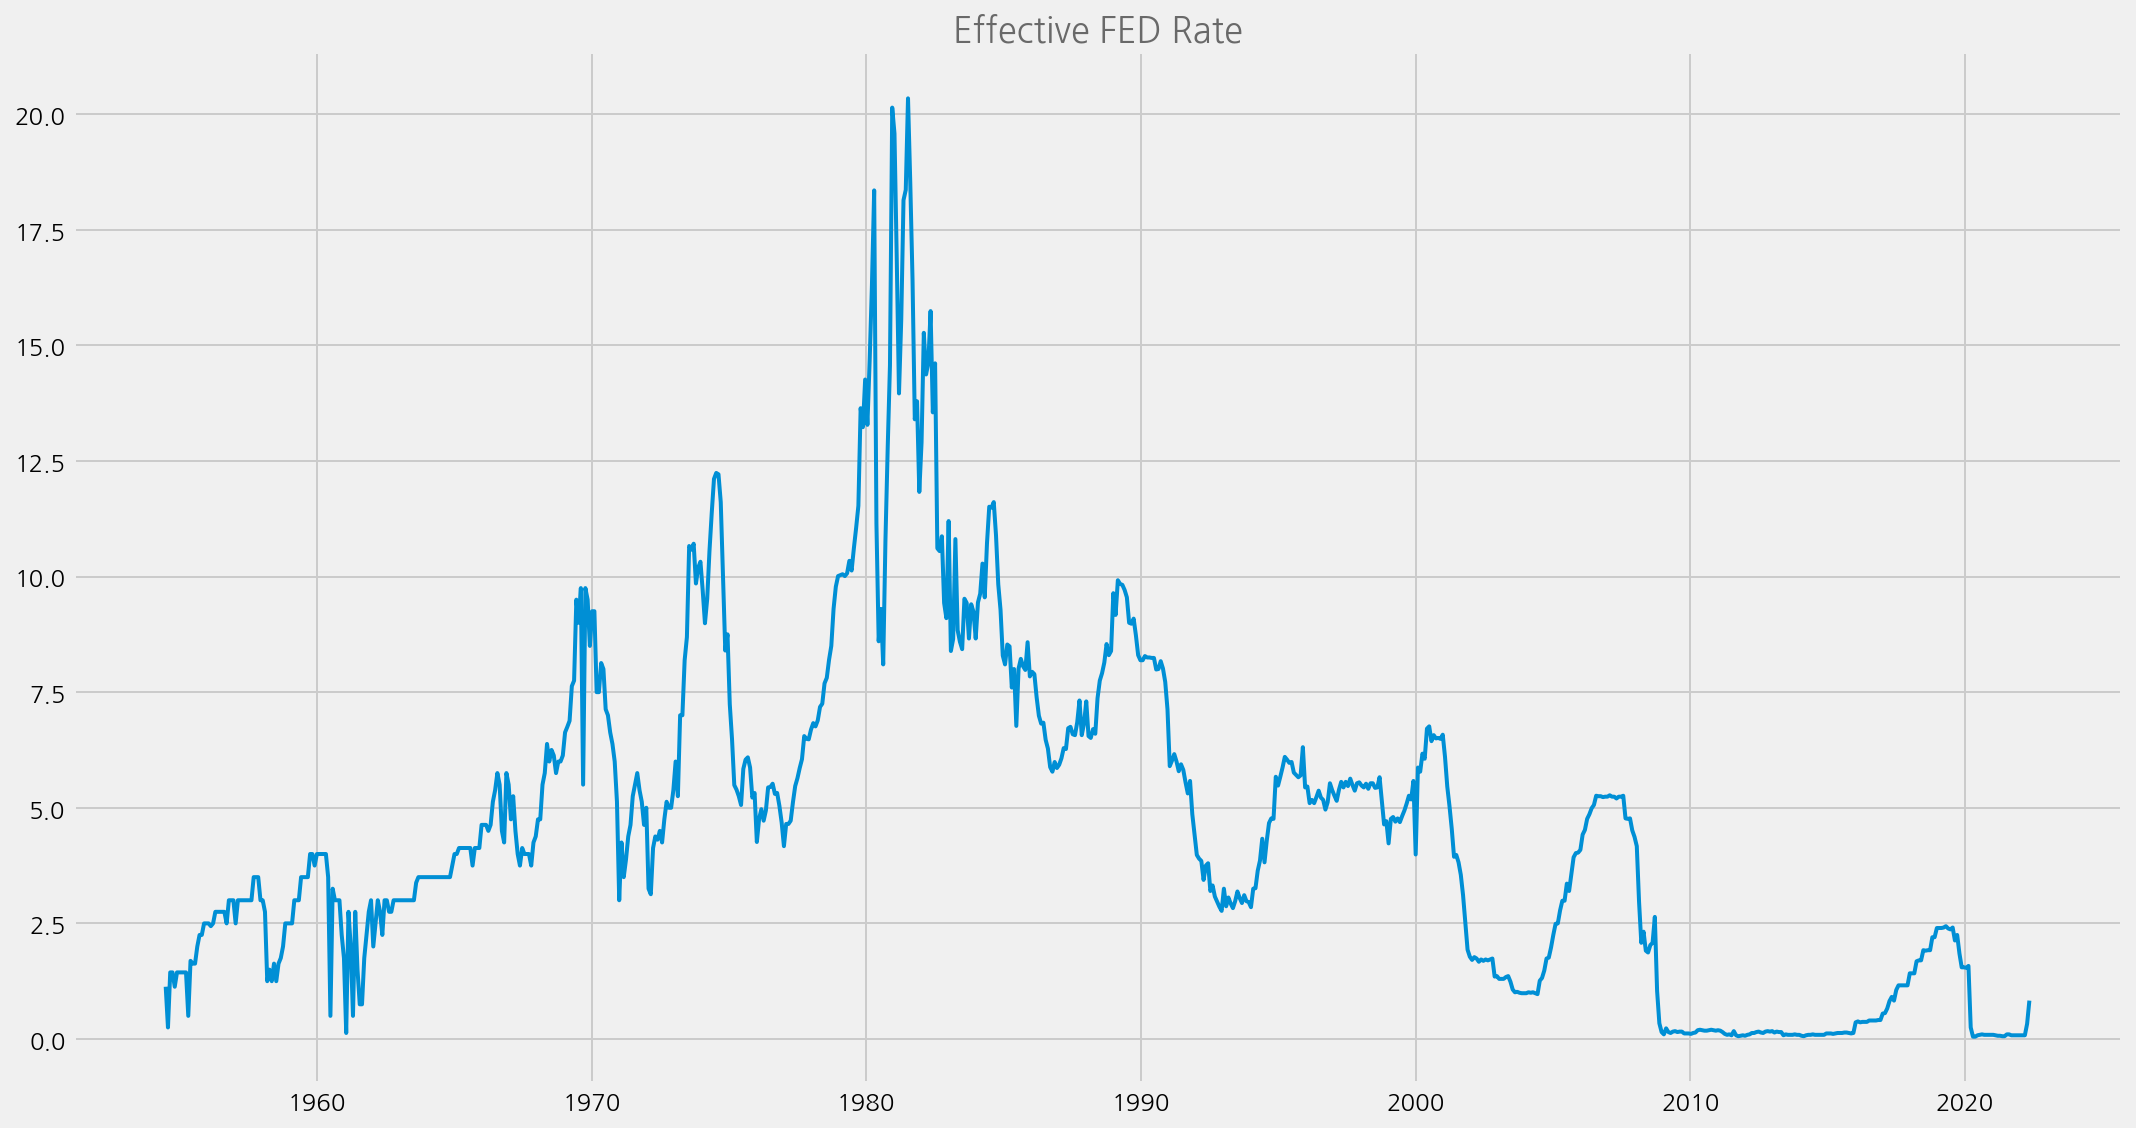

In [11]:
# Use every 30th row as it has too many data points
dff_30 = dff.iloc[::30, :]
print(dff_30.shape)

cfg = eKonf.compose(config_group='visualize/plot=lineplot')
cfg.series.y = "DFF"
cfg.plot.figsize = (15, 8)
cfg.figure.title = 'Effective FED Rate'
eKonf.instantiate(cfg, data=dff_30)

## Load Economic Indices

In [12]:
import pandas as pd
from tqdm import tqdm

econ_indicators = {}
# quandl.force_download = True

for name, sr in tqdm(fomc.econ_series.items()):
    econ_indicators[sr["name"]] = quandl.load(
        series_id=sr["id"], series_name=sr["name"], expressions=sr["expressions"]
    )

100%|██████████| 10/10 [00:00<00:00, 477.35it/s]


### Treasury Yield
#### Getting from US Treasury Site as xml

In [13]:
import pandas as pd

treasury_yield_url = "https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/all/all?type=daily_treasury_yield_curve&field_tdr_date_value=all&data=yieldAll&page&_format=csv"
treasury = pd.read_csv(treasury_yield_url)
treasury['Date'] = pd.to_datetime(treasury['Date'])
treasury.set_index('Date', inplace=True)
treasury

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,
2022-05-26,0.71,0.90,1.07,1.52,1.99,2.46,2.63,2.70,2.75,2.75,3.18,2.99
2022-05-25,0.58,0.88,1.06,1.52,2.01,2.48,2.63,2.71,2.76,2.75,3.14,2.97
2022-05-24,0.55,0.88,1.06,1.53,2.02,2.50,2.66,2.76,2.80,2.76,3.16,2.98
2022-05-23,0.55,0.90,1.07,1.57,2.09,2.65,2.80,2.88,2.90,2.86,3.26,3.08
2022-05-20,0.63,0.87,1.03,1.51,2.07,2.60,2.73,2.80,2.82,2.78,3.17,2.99
...,...,...,...,...,...,...,...,...,...,...,...,...
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04


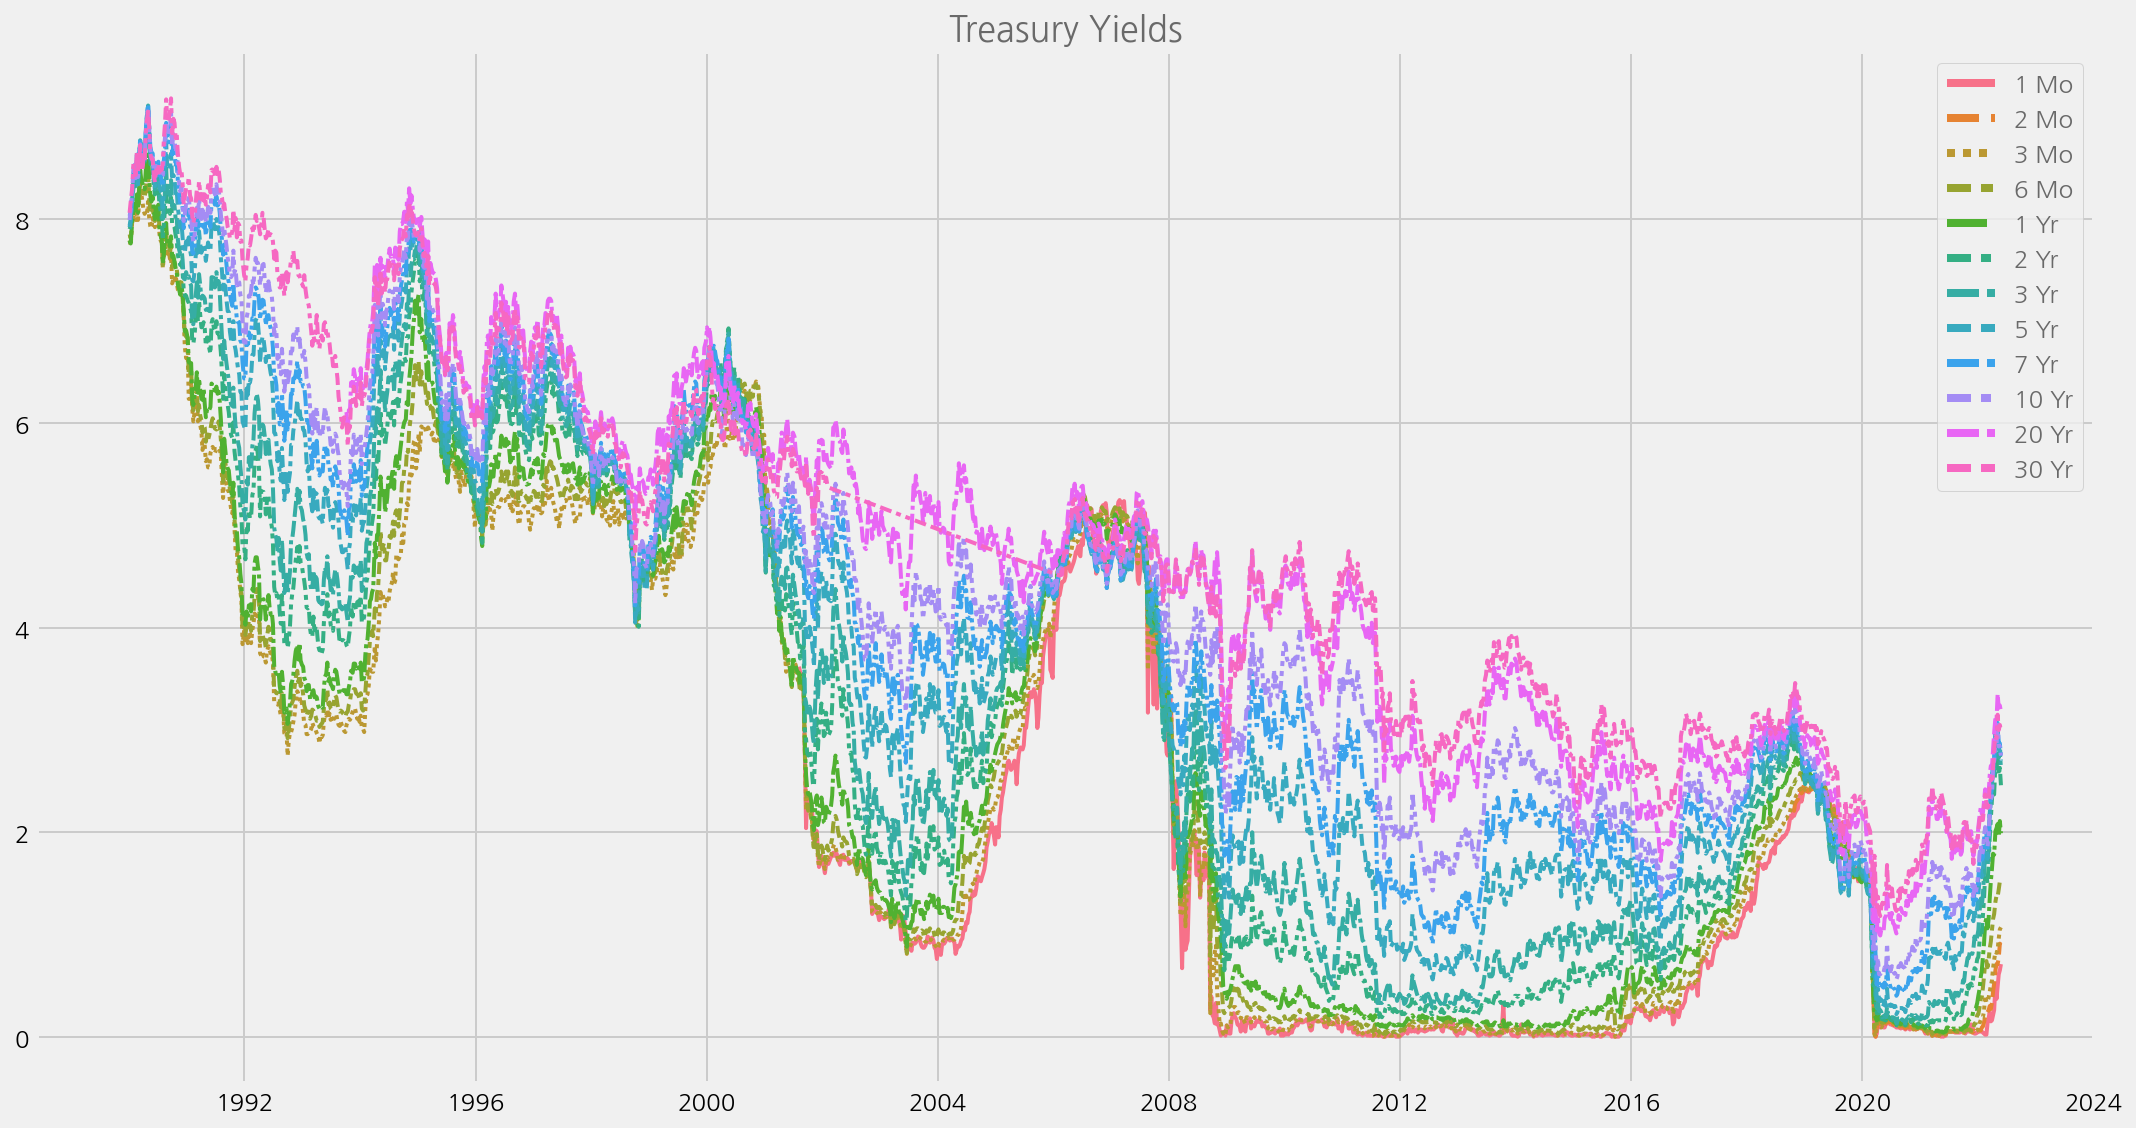

In [14]:
# Use every 5th row as it has too many data points
treasury_5 = treasury.iloc[::5, :]

cfg = eKonf.compose(config_group="visualize/plot=lineplot")
cfg.series.y = list(treasury_5.columns)
cfg.plot.figsize = (15, 8)
cfg.figure.title = "Treasury Yields"
eKonf.instantiate(cfg, data=treasury_5)

### Add Rate and Decisions

In [15]:
fomc.add_decisions_to_calendar(fedrates)
fomc_calendar = fomc.calendar.copy()
fomc_calendar

100%|██████████| 427/427 [00:00<00:00, 1196.43it/s]


,unscheduled,forecast,confcall,speaker,rate,rate_change,rate_decision
date,,,,,,,
1982-10-05,False,False,False,Paul Volcker,9.50,-0.50,-1.0
1982-11-16,False,False,False,Paul Volcker,9.00,-0.50,-1.0
1982-12-21,False,False,False,Paul Volcker,8.50,0.00,0.0
1983-01-14,False,False,True,Paul Volcker,8.50,0.00,0.0
1983-01-21,False,False,True,Paul Volcker,8.50,0.00,0.0
...,...,...,...,...,...,...,...
2021-11-03,False,False,False,Jerome Powell,0.25,0.00,0.0
2021-12-15,False,True,False,Jerome Powell,0.25,0.00,0.0
2022-01-26,False,False,False,Jerome Powell,0.25,0.00,0.0


Though this is not perfect as Target Rate was sometimes changed between FOMC meetings, enough to analyze the impact of FOMC Meetings.

## Add Quantitative Easing as a Lower event
Between 2008 and 2016 saw zero interest rate. Main monetary measure shifted to quantity from rate. Thus, add "lower" events when those QE was announced.

In [16]:
fomc.add_unconventionals_to_calendar()
fomc_calendar = fomc.calendar.copy()
fomc_calendar

,unscheduled,forecast,confcall,speaker,rate,rate_change,rate_decision,rate_changed
date,,,,,,,,
1982-10-05,False,False,False,Paul Volcker,9.50,-0.50,-1.0,1
1982-11-16,False,False,False,Paul Volcker,9.00,-0.50,-1.0,1
1982-12-21,False,False,False,Paul Volcker,8.50,0.00,0.0,0
1983-01-14,False,False,True,Paul Volcker,8.50,0.00,0.0,0
1983-01-21,False,False,True,Paul Volcker,8.50,0.00,0.0,0
...,...,...,...,...,...,...,...,...
2021-11-03,False,False,False,Jerome Powell,0.25,0.00,0.0,0
2021-12-15,False,True,False,Jerome Powell,0.25,0.00,0.0,0
2022-01-26,False,False,False,Jerome Powell,0.25,0.00,0.0,0


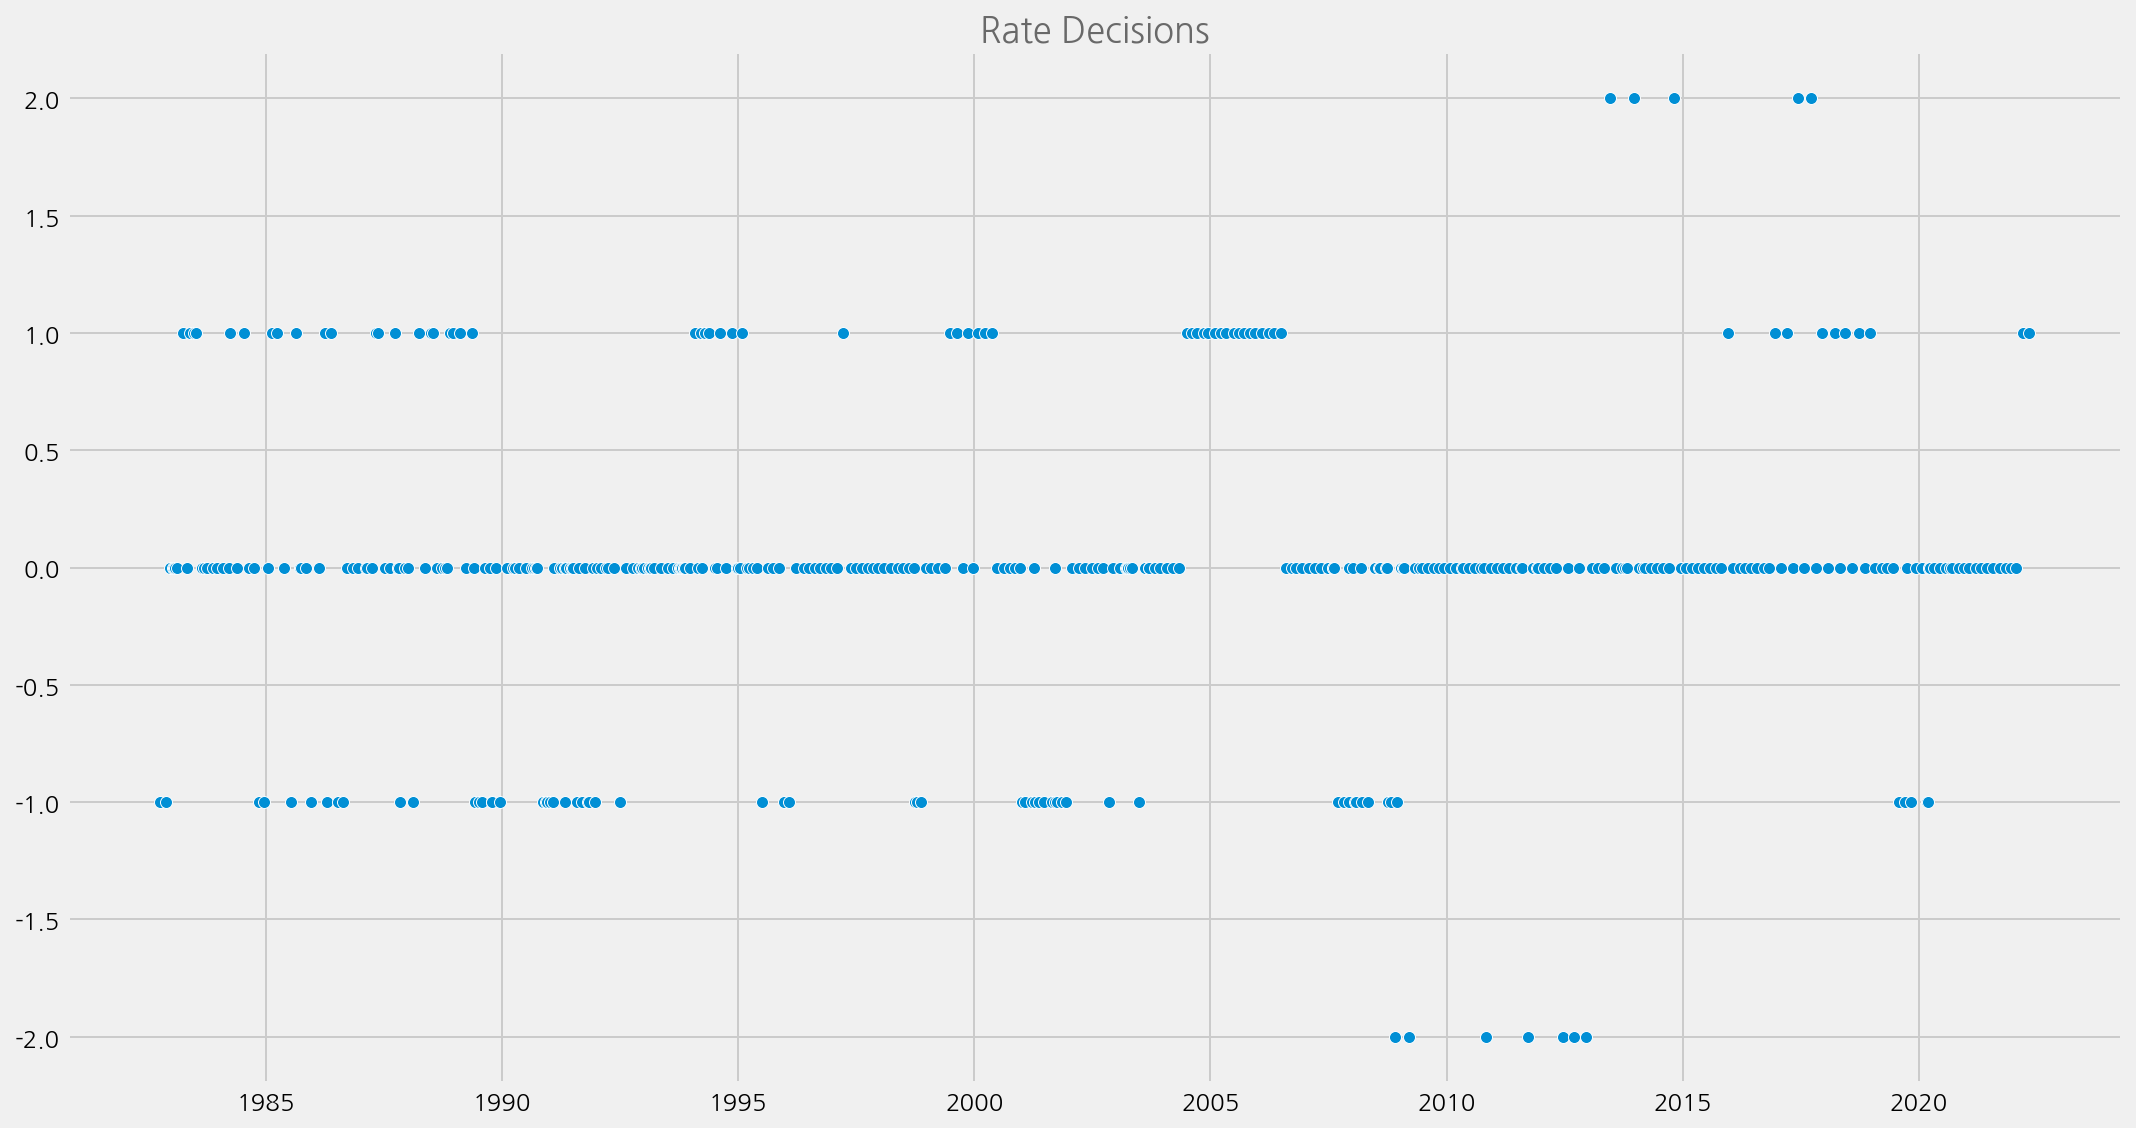

In [17]:
cfg = eKonf.compose(config_group="visualize/plot=scatter")
cfg.series.y = "rate_decision"
cfg.plot.figsize = (15, 8)
cfg.figure.title = "Rate Decisions"
# eKonf.print(cfg)
eKonf.instantiate(cfg, data=fomc_calendar)

In [74]:
econ_data = load_dataframe(data_file="econ_data.parquet")
if econ_data is not None:
    print(econ_data.tail())

            unscheduled  forecast  confcall          chair  rate  rate_change  \
date                                                                            
2021-11-03        False     False     False  Jerome Powell  0.25         0.00   
2021-12-15        False      True     False  Jerome Powell  0.25         0.00   
2022-01-26        False     False     False  Jerome Powell  0.25         0.00   
2022-03-16        False      True     False  Jerome Powell  0.50         0.25   
2022-05-04        False     False     False  Jerome Powell  1.00         0.50   

            rate_decision  rate_changed        GDP  GDP_diff_prev  ...  \
date                                                               ...   
2021-11-03              0             0  19478.893       0.570948  ...   
2021-12-15              0             0  19478.893       0.570948  ...   
2022-01-26              0             0  19478.893       0.570948  ...   
2022-03-16              1             1  19806.290       1.680

In [18]:
econ_data = fomc_calendar.copy()

for name, sr in fomc.econ_series.items():
    offset = sr["relativedelta"]
    columns = [name, name + "_diff_prev", name + "_diff_year"]
    econ_data = fomc.add_available_latest(
        econ_data, econ_indicators[name], name, columns, offset
    )

save_dataframe(econ_data, output_file="econ_data.parquet")

100%|██████████| 415/415 [00:00<00:00, 1198.11it/s]


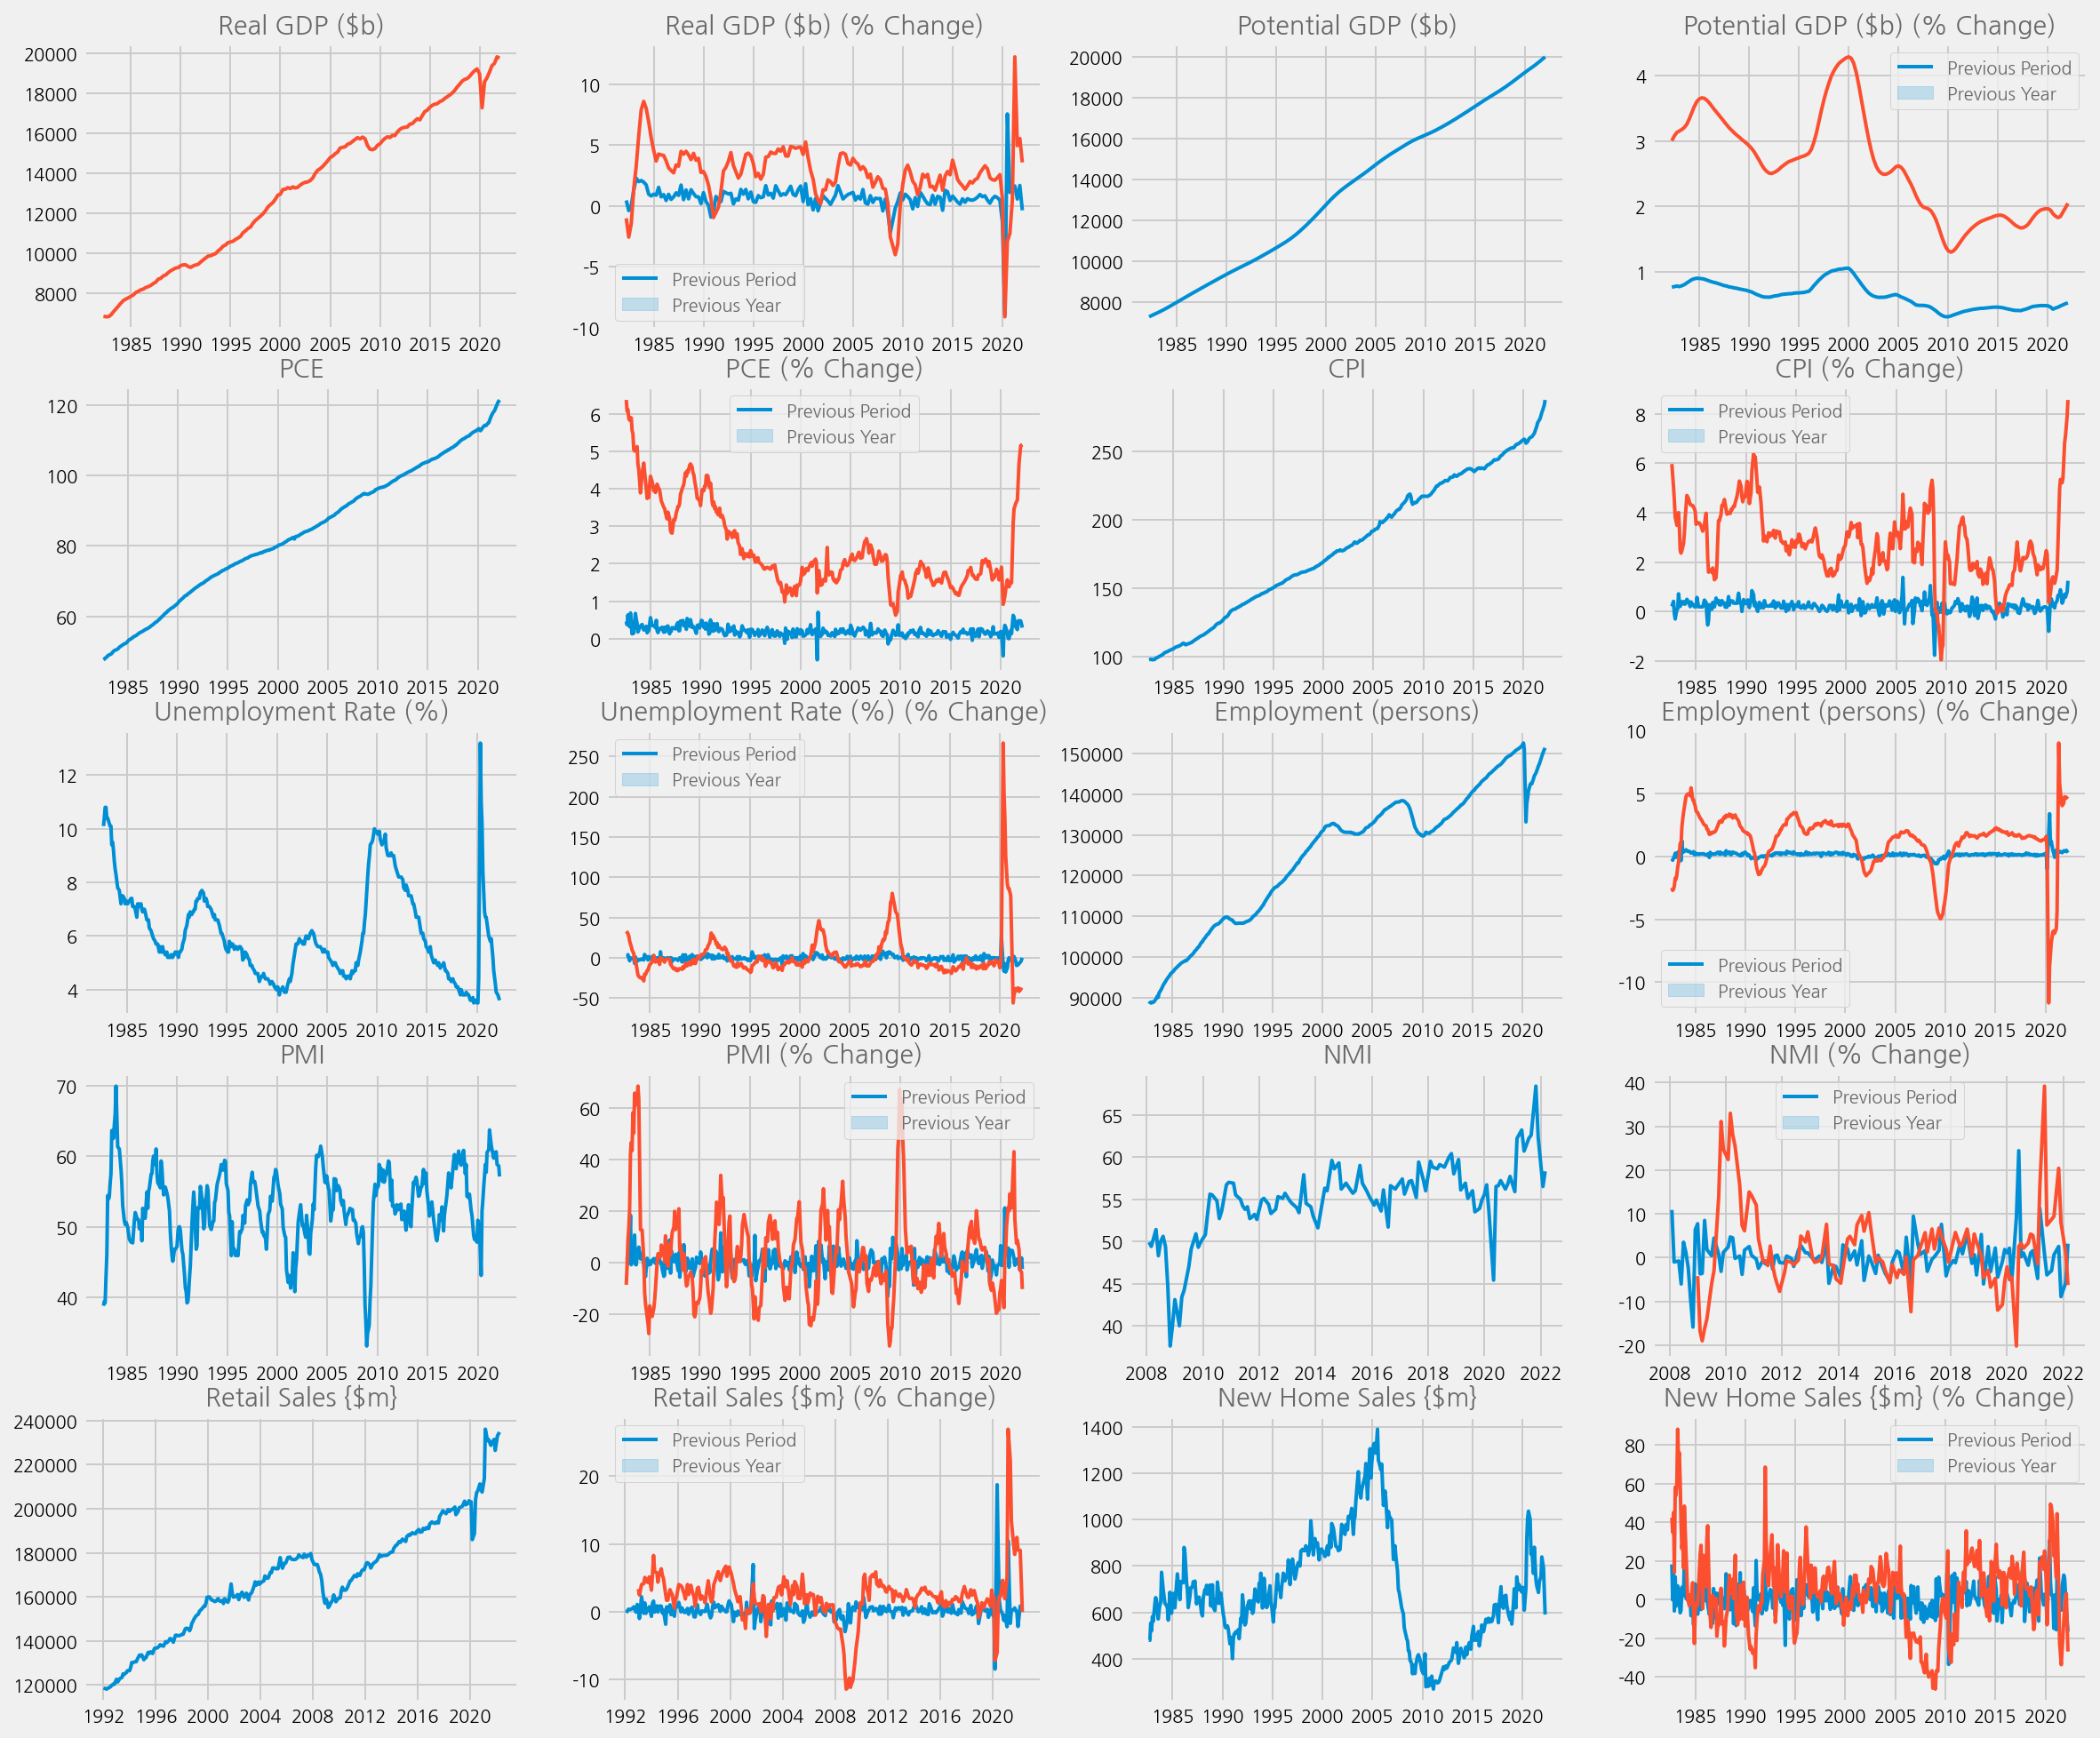

In [20]:
cfg = eKonf.compose(config_group="visualize/plot=lineplot")

cfg.series.form = "individual"
cfg.plot.figsize = (18,16)
cfg.plot.fontsize = 10
cfg.subplots.ncols = 4
cfg.subplots.nrows = 5
lineplot = cfg.lineplot.copy()
figure = cfg.figure.copy()

for i, sr in enumerate(fomc.econ_series.values()):
    name = sr["name"]
    title = sr["title"]
    plot = lineplot.copy()
    plot.x = name + "_date"
    plot.y = name
    plot.axno = i*2
    cfg.plots.append(plot)
    fig = figure.copy()
    fig.title = title
    fig.axno = i*2
    cfg.figures.append(fig)
    fig = figure.copy()
    fig.title = title + " (% Change)"
    fig.legend = ['Previous Period', 'Previous Year']
    fig.axno = i*2+1
    cfg.figures.append(fig)
    plot = lineplot.copy()
    plot.x = name + "_date"
    plot.y = name + "_diff_prev"
    plot.axno = i*2+1
    cfg.plots.append(plot)
    plot = lineplot.copy()
    plot.x = name + "_date"
    plot.y = name + "_diff_year"
    plot.axno = i*2+1
    cfg.plots.append(plot)

eKonf.instantiate(cfg, data=econ_data)


## Add Taylor Rule

As FED has released how policymakers use these data here, try to calculate them and use instead of raw data. <BR />
https://www.federalreserve.gov/monetarypolicy/policy-rules-and-how-policymakers-use-them.htm

In [21]:
# Create taylor dataframe
taylor = fedrates.copy()

for name in ['GDP', 'GDPPOT', 'PCE']:
    sr = fomc.econ_series[name]
    offset = sr["relativedelta"]
    columns = [name, name + "_diff_prev", name + "_diff_year"]
    taylor = fomc.add_available_latest(
        taylor, econ_indicators[name], name, columns, offset
    )

100%|██████████| 14486/14486 [00:11<00:00, 1217.74it/s]


In [22]:
import numpy as np

# Obtain available index used to calculate Taylor rule each day
taylor["Y"] = taylor["GDP"]
taylor["Yp"] = taylor["GDPPOT"]
taylor["Y-Yp"] = (np.log(taylor["Y"] * 10 ** 9) - np.log(taylor["Yp"] * 10 ** 9)) * 100

taylor["Pi"] = taylor["PCE_diff_year"]
taylor["Pi*"] = 2
taylor["Pi-Pi*"] = taylor["Pi"] - taylor["Pi*"]

taylor["r"] = 2
taylor["Rate"] = taylor["DFEDTAR"]


In [23]:
# Calculate Taylor Rule
taylor['Taylor'] = taylor['r'] + taylor['Pi'] + 0.5 * taylor['Pi-Pi*'] + 0.5 * taylor['Y-Yp']

# Calculate Balanced-approach Rule
taylor['Balanced'] = (taylor['r'] + taylor['Pi'] + 0.5 * taylor['Pi-Pi*'] + taylor['Y-Yp']).map(lambda x: 0 if x < 0 else x)

# Calculate Inertia Rule
taylor['Inertia'] = 0.85 * taylor['Rate'] - 0.15 * taylor['Balanced']

# Keey necessary columns only
taylor = taylor[['Rate', 'Taylor', 'Balanced', 'Inertia']]

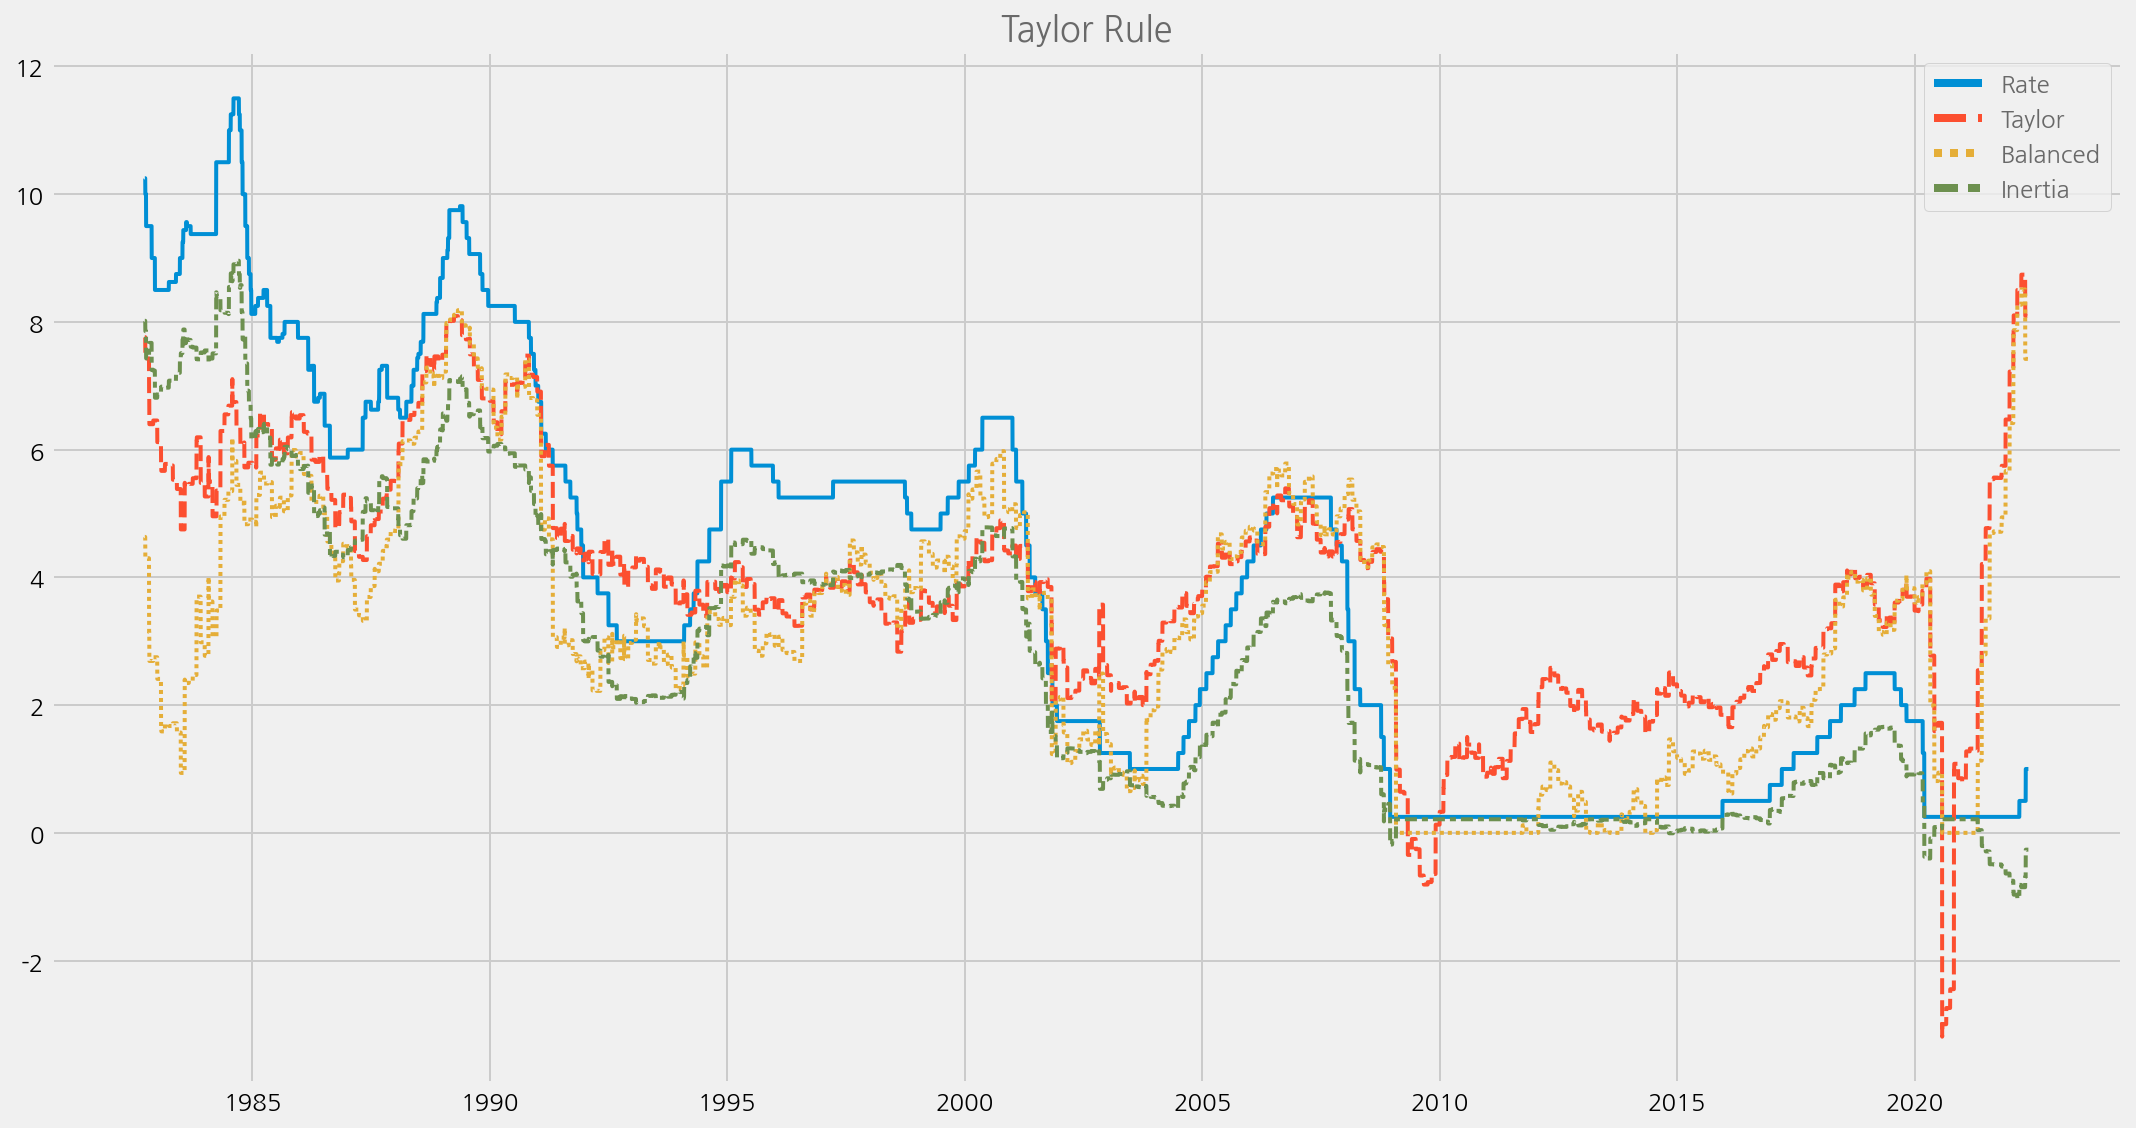

In [24]:
cfg = eKonf.compose(config_group="visualize/plot=lineplot")
cfg.series.y = list(taylor.columns)
cfg.plot.figsize = (15, 8)
cfg.figure.title = "Taylor Rule"
eKonf.instantiate(cfg, data=taylor)

In [25]:
taylor = taylor.copy()

# Deviation from Rate, which may trigger the rate change
taylor['Taylor-Rate'] = taylor['Taylor'] - taylor['Rate']
taylor['Balanced-Rate'] = taylor['Balanced'] - taylor['Rate']
taylor['Inertia-Rate'] = taylor['Inertia'] - taylor['Rate']

taylor['Taylor_diff'] = taylor['Taylor'].diff(1)
taylor['Balanced_diff'] = taylor['Balanced'].diff(1)
taylor['Inertia_diff'] = taylor['Inertia'].diff(1)

taylor.tail()

,Rate,Taylor,Balanced,Inertia,Taylor-Rate,Balanced-Rate,Inertia-Rate,Taylor_diff,Balanced_diff,Inertia_diff
date,,,,,,,,,,
2022-05-21,1.0,8.094924,7.420939,-0.263141,7.094924,6.420939,-1.263141,0.0,0.0,0.0
2022-05-22,1.0,8.094924,7.420939,-0.263141,7.094924,6.420939,-1.263141,0.0,0.0,0.0
2022-05-23,1.0,8.094924,7.420939,-0.263141,7.094924,6.420939,-1.263141,0.0,0.0,0.0
2022-05-24,1.0,8.094924,7.420939,-0.263141,7.094924,6.420939,-1.263141,0.0,0.0,0.0
2022-05-25,1.0,8.094924,7.420939,-0.263141,7.094924,6.420939,-1.263141,0.0,0.0,0.0


In [26]:
taylor2 = taylor.copy()
taylor2.reset_index(inplace=True)
taylor2['date'] = taylor2['date'].shift(-1)

econ_data2 = econ_data.reset_index().merge(taylor2, on='date', how='left')
econ_data2.set_index('date', inplace=True)
save_dataframe(econ_data2, output_file="econ_data2.parquet")
econ_data2


,unscheduled,forecast,confcall,speaker,rate,rate_change,rate_decision,rate_changed,GDP,GDP_diff_prev,...,Rate,Taylor,Balanced,Inertia,Taylor-Rate,Balanced-Rate,Inertia-Rate,Taylor_diff,Balanced_diff,Inertia_diff
date,,,,,,,,,,,,,,,,,,,,,
1982-10-05,False,False,False,Paul Volcker,9.50,-0.50,-1.0,1,6830.251,0.456199,...,10.00,7.428054,4.300007,7.854999,-2.571946,-5.699993,-2.145001,0.0,0.0,0.0
1982-11-16,False,False,False,Paul Volcker,9.00,-0.50,-1.0,1,6804.139,-0.382299,...,9.50,6.397952,2.690992,7.671351,-3.102048,-6.809008,-1.828649,0.0,0.0,0.0
1982-12-21,False,False,False,Paul Volcker,8.50,0.00,0.0,0,6804.139,-0.382299,...,8.50,6.456348,2.749388,6.812592,-2.043652,-5.750612,-1.687408,0.0,0.0,0.0
1983-01-14,False,False,True,Paul Volcker,8.50,0.00,0.0,0,6804.139,-0.382299,...,8.50,6.117343,2.410384,6.863442,-2.382657,-6.089616,-1.636558,0.0,0.0,0.0
1983-01-21,False,False,True,Paul Volcker,8.50,0.00,0.0,0,6804.139,-0.382299,...,8.50,6.117343,2.410384,6.863442,-2.382657,-6.089616,-1.636558,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03,False,False,False,Jerome Powell,0.25,0.00,0.0,0,19478.893,0.570948,...,0.25,5.747177,4.940210,-0.528532,5.497177,4.690210,-0.778532,0.0,0.0,0.0
2021-12-15,False,True,False,Jerome Powell,0.25,0.00,0.0,0,19478.893,0.570948,...,0.25,6.472329,5.665362,-0.637304,6.222329,5.415362,-0.887304,0.0,0.0,0.0
2022-01-26,False,False,False,Jerome Powell,0.25,0.00,0.0,0,19478.893,0.570948,...,0.25,7.222928,6.415961,-0.749894,6.972928,6.165961,-0.999894,0.0,0.0,0.0
